In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mdsutils

In [2]:
athena = mdsutils.AthenaClient("datalake_production_kafka_raw")

In [ ]:
%%time

trnx_query = """
select k.value,
       k.offset,
       k.partition
from "datalake_production_kafka_raw"."com_sofi_banking_schemas_bankingtransactionoccurred" k
"""

trnx = athena.query_to_df(trnx_query)
trnx.to_parquet("../../artifacts/data-dump/kafka-trnx-01102022.parquet")

In [31]:
trnx.shape

(71290593, 3)

In [32]:
trnx.head()

,value,offset,partition
0,"{partyid=14442340, amount=10.00, accountbalanc...",465419,15
1,"{partyid=2925293, amount=269.91, accountbalanc...",465420,15
2,"{partyid=63884, amount=23.50, accountbalance=2...",465421,15
3,"{partyid=244364, amount=61.18, accountbalance=...",465422,15
4,"{partyid=14395863, amount=74.75, accountbalanc...",465423,15


In [33]:
i

'{partyid=15046897, amount=0.30, accountbalance=9.86, hostdate=1579978147000, effectivedate=null, systemdate=1579910400000, holdexpires=null, transactioncode=POSDW, transactioncategory=purchasefromchecking, histseq=30, transeq=12073001, reverseseq=null, accountnum=410003813061, recipient=null, sender=null, externalbankname=null, externalbankaccountnumber=null, achdetails=null, billpay=null, comment=null, isdebit=true, sourcedata={ZCRDN=1000001775360003, ZMCC=5541}, eft={authcode=010122, authid=A1579996147351505014467, cardpointer=null, trantype=POS, merchanttradename=7-ELEVEN, isforeigntransaction=false, currency=null, conversionrate=null, foreignamount=null, foreignfeeamount=null, foreigntotalamount=null}, source={deviceid=00MUSI01, messageid=A1579996147351505014467, localdate=2020-01-25, receipt=null, address=null, authdate=null}, primarypartyid=15046897, secondarypartyid=null, merchantname=7-ELEVEN, transactiontype=Debit Card, isvault=false, transactiondescription=7-ELEVEN, transact

In [38]:
import re

# amount pattern
fields = ["amount", "partyid", "transactioncode", "transeq", "isdebit", 
         "localdate", "primarypartyid", "accountnum", "accountbalance",
          "transactiontype", "isvault", "vaultendbalance", "authid"]

for f in fields:
    p = f"[^a-zA-Z0-9]{f}=([a-zA-Z0-9.]+)"
    print(p)

    pattern = re.compile(p)
    display(re.findall(pattern, i))

[^a-zA-Z0-9]amount=([a-zA-Z0-9.]+)


['0.30']

[^a-zA-Z0-9]partyid=([a-zA-Z0-9.]+)


['15046897']

[^a-zA-Z0-9]transactioncode=([a-zA-Z0-9.]+)


['POSDW']

[^a-zA-Z0-9]transeq=([a-zA-Z0-9.]+)


['12073001']

[^a-zA-Z0-9]isdebit=([a-zA-Z0-9.]+)


['true']

[^a-zA-Z0-9]localdate=([a-zA-Z0-9.]+)


['2020']

[^a-zA-Z0-9]primarypartyid=([a-zA-Z0-9.]+)


['15046897']

[^a-zA-Z0-9]accountnum=([a-zA-Z0-9.]+)


['410003813061']

[^a-zA-Z0-9]accountbalance=([a-zA-Z0-9.]+)


['9.86']

[^a-zA-Z0-9]transactiontype=([a-zA-Z0-9.]+)


['Debit']

[^a-zA-Z0-9]isvault=([a-zA-Z0-9.]+)


['false']

[^a-zA-Z0-9]vaultendbalance=([a-zA-Z0-9.]+)


['null']

[^a-zA-Z0-9]authid=([a-zA-Z0-9.]+)


['A1579996147351505014467']

In [ ]:
%%time
df = trnx

for f in fields:
    p = f"[^a-zA-Z0-9]{f}=([a-zA-Z0-9.-]+)"
    print(f, p)

    pattern = re.compile(p)
    df[f] = df["value"].str.extract(fr'{p}')
    
df.to_parquet("../../artifacts/data-dump/kafka-trnx-01102022-processed.parquet")

amount [^a-zA-Z0-9]amount=([a-zA-Z0-9.]+)
partyid [^a-zA-Z0-9]partyid=([a-zA-Z0-9.]+)
transactioncode [^a-zA-Z0-9]transactioncode=([a-zA-Z0-9.]+)
transeq [^a-zA-Z0-9]transeq=([a-zA-Z0-9.]+)
isdebit [^a-zA-Z0-9]isdebit=([a-zA-Z0-9.]+)


In [52]:
df.head()

,value,offset,partition,amount,partyid,transactioncode,transeq,isdebit,localdate,primarypartyid,accountnum,accountbalance,transactiontype,isvault,vaultendbalance,authid
0,"{partyid=14442340, amount=10.00, accountbalanc...",465419,15,10.00,14442340,POSDW,347001,true,2020,14442340,410002450376,581.8,Debit,false,null,A1579876665856642014467
1,"{partyid=2925293, amount=269.91, accountbalanc...",465420,15,269.91,2925293,POSDW,363001,true,2020,2925293,410002216284,2442.29,Debit,false,null,A1579895742486154014467
2,"{partyid=63884, amount=23.50, accountbalance=2...",465421,15,23.50,63884,DWATM,378001,true,2020,63884,410000317473,263445.72,ATM,false,null,A1579930677798430014467
3,"{partyid=244364, amount=61.18, accountbalance=...",465422,15,61.18,244364,POSDW,393001,true,2020,244364,410000378586,1805.1,Debit,false,null,A1579842411797425014467
4,"{partyid=14395863, amount=74.75, accountbalanc...",465423,15,74.75,14395863,DWCRDBILLPAY,400001,true,2020,14395863,410002407897,770.34,Debit,false,null,A1579899938642529014467


In [54]:
df.to_parquet("../../artifacts/data-dump/kafka-trnx-01102022-processed.parquet")
df.shape

(71290593, 16)

### Get DW transactions data with authid
---

In [32]:
%%time

from rdsutils.query import query_postgres

query = """
-- banking transactions by business account.
SELECT tjd,
       dtj.time,
       dtj.cid AS business_account_number,
       cdt AS created_dt,
       endbal,
       dtj.etc AS transaction_code,
       tamt AS amount,
       split_part(split_part(dtj.tso, 'AUTHID#', 2), '~', 1) AS authid,
       trn.dc as is_credit,
       cif.zsofiid as user_id
FROM dtj
JOIN profile_reporting.dep ON dep.cid = dtj.cid
JOIN cif ON cif.acn = dep.acn
LEFT JOIN trn on dtj.etc = trn.etc;
"""

df_dw = query_postgres(query=query, port=15556, database="sofi_profile_reporting")
df_dw.to_parquet("../../artifacts/data-dump/dw-trnx-01102022.parquet")

CPU times: user 6min 27s, sys: 42.8 s, total: 7min 9s
Wall time: 14min 10s


In [33]:
df_dw

,tjd,time,business_account_number,created_dt,endbal,transaction_code,amount,authid,is_credit,user_id
0,2022-01-06,19:08:31,450019197849,2022-01-06,2476.91,OTOD,42.03,,0,13051072
1,2022-01-06,19:08:29,450019748019,2022-01-06,143.97,DDTRF,.19,,1,14963677
2,2022-01-06,19:08:36,410000404421,2022-01-06,1803.15,POSDW,32.01,A1641514116983312019199,0,12396371
3,2022-01-06,19:08:50,410023034827,2022-01-06,0.20,DDREWARDS,0.10,,1,21476525
4,2022-01-06,19:08:50,410000404421,2022-01-06,1802.16,DWTRF,.99,,0,12396371
...,...,...,...,...,...,...,...,...,...,...
71632160,2022-01-06,19:08:05,410019395965,2022-01-06,284.07,DWATM,360.00,A1641514085980359018848,0,20228604
71632161,2022-01-06,19:08:09,450015883564,2022-01-06,2131.11,DDTRF,.84,,1,14209526
71632162,2022-01-06,19:08:05,410016954752,2022-01-06,394.55,POSDD,394.00,A1641514085580813019199,1,19423930
71632163,2022-01-06,19:08:06,410001996909,2022-01-06,975.21,POSDW,58.18,A1641513936089890019521,0,14092843


#### Checkpoint - next: load back important columns and process
---

In [34]:
%%time
columns = ["amount", "partyid", "transactioncode", "transeq", "isdebit", 
         "localdate", "primarypartyid", "accountnum", "accountbalance",
          "transactiontype", "isvault", "vaultendbalance", "authid", "offset", "partition"]
df_kafka = pd.read_parquet("../../artifacts/data-dump/kafka-trnx-01102022-processed.parquet", columns=columns)
df_dw = pd.read_parquet("../../artifacts/data-dump/dw-trnx-01102022.parquet")

CPU times: user 2min 2s, sys: 28.2 s, total: 2min 30s
Wall time: 1min 40s


In [35]:
import gc
gc.collect()

176

In [36]:
df_kafka.shape, df_dw.shape

((71290593, 15), (71632165, 10))

In [99]:
rename_dict = {"partyid": "user_id", 
               "localdate": "transaction_date",
               "accountnum": "business_account_number",  #?
               "transactiontype": "transaction_type",
               "accountbalance": "account_balance",
               "transactioncode": "transaction_code"
               }
df_kafka.rename(columns=rename_dict, inplace=True)

In [64]:
df_kafka[df_kafka=="null"] = np.nan
df_kafka = df_kafka[~(df_kafka["account_balance"].isna() | df_kafka["amount"].isna())]

In [65]:
rename_dict = {"tjd": "transaction_date",
               "endbal": "account_balance",
               }
df_dw.rename(columns=rename_dict, inplace=True)

In [66]:
def preprocess(df):
    df = df[~df["authid"].isna()]
    df = df.drop_duplicates(["user_id", "transaction_date", "authid", "business_account_number", "account_balance"])
    
    df["user_id"] = df["user_id"].astype(int)
    df["transaction_date"] = pd.to_datetime(df["transaction_date"])
    df["business_account_number"] = df["business_account_number"].astype(int)
    df["account_balance"] = df["account_balance"].astype(float)
    df["amount"] = df["amount"].astype(float)
    return df

In [74]:
fn = lambda x: x.split("#")[0]
idx = df_dw["amount"].str.contains("#")
df_dw.loc[idx, "amount"] = df_dw.loc[idx, "amount"].apply(fn)

In [85]:
idx = df_dw["authid"] == ""
df_dw.loc[idx, "authid"] = np.nan

In [86]:
%%time
df_kafka = preprocess(df_kafka)
df_dw = preprocess(df_dw)

CPU times: user 1min 53s, sys: 8.17 s, total: 2min 1s
Wall time: 2min 1s


In [87]:
df_kafka.shape, df_dw.shape

((29772651, 15), (30032594, 10))

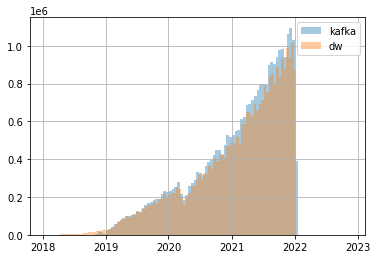

In [88]:
df_kafka.transaction_date.hist(bins=100, alpha=0.4, label="kafka")
df_dw.transaction_date.hist(bins=100, alpha=0.4, label="dw")
plt.legend()

In [123]:
df_kafka.to_parquet("../../artifacts/data-dump/kafka-trnx-01102022-cleaned.parquet")
df_dw.to_parquet("../../artifacts/data-dump/dw-trnx-01102022-cleaned.parquet")

### looks promising!!!

In [3]:
df_kafka = pd.read_parquet("../../artifacts/data-dump/kafka-trnx-01102022-cleaned.parquet")
df_dw = pd.read_parquet("../../artifacts/data-dump/dw-trnx-01102022-cleaned.parquet")

In [4]:
import gc
gc.collect()

22

In [5]:
df_kafka.authid.nunique(), df_dw.authid.nunique(), df_kafka.shape, df_dw.shape

(28611883, 29142539, (29451092, 15), (30032594, 10))

In [6]:
df_kafka.authid.value_counts().head()

A1568869120276758006129    12
A1579391247789047014467    10
A1579578636462344014467    10
A1562894043842591005065    10
A1576790761220155014467     9
Name: authid, dtype: int64

In [7]:
df_kafka[df_kafka.authid == "A1568869120276758006129"]

,amount,user_id,transaction_code,transeq,isdebit,transaction_date,primarypartyid,business_account_number,account_balance,transaction_type,isvault,vaultendbalance,authid,offset,partition
375848,29.0,11459522,POSDW,4287001,true,2019-09-19,11459522,410001984867,11634.62,Debit,None,None,A1568869120276758006129,233033,7
943293,79.0,11459522,POSDW,4282001,true,2019-09-19,11459522,410001984867,11900.62,Debit,None,None,A1568869120276758006129,233079,9
2639894,26.0,11459522,POSDW,4283001,true,2019-09-19,11459522,410001984867,11874.62,Debit,None,None,A1568869120276758006129,233060,11
3188176,66.0,11459522,POSDW,4284001,true,2019-09-19,11459522,410001984867,11808.62,Debit,None,None,A1568869120276758006129,233057,4
3767723,79.0,11459522,POSDW,4288001,true,2019-09-19,11459522,410001984867,11555.62,Debit,None,None,A1568869120276758006129,233086,3
4109918,76.0,11459522,POSDW,4285001,true,2019-09-19,11459522,410001984867,11732.62,Debit,None,None,A1568869120276758006129,233063,1
4337319,29.0,11459522,POSDW,4276001,true,2019-09-19,11459522,410001984867,13150.62,Debit,None,None,A1568869120276758006129,233081,8
5103333,551.0,11459522,POSDW,4281001,true,2019-09-19,11459522,410001984867,11979.62,Debit,None,None,A1568869120276758006129,233045,14
5453141,69.0,11459522,POSDW,4280001,true,2019-09-19,11459522,410001984867,12530.62,Debit,None,None,A1568869120276758006129,233080,12
6185906,551.0,11459522,POSDW,4279001,true,2019-09-19,11459522,410001984867,12599.62,Debit,None,None,A1568869120276758006129,233062,2


In [8]:
df_dw[df_dw.authid == "A1568869120276758006129"]

,transaction_date,time,business_account_number,created_dt,account_balance,transaction_code,amount,authid,is_credit,user_id
27381954,2019-09-19,12:45:54,410001984867,2019-09-19,13179.62,POSDW,551.0,A1568869120276758006129,0,11459522
27381955,2019-09-19,12:45:54,410001984867,2019-09-19,13150.62,POSDW,29.0,A1568869120276758006129,0,11459522
27381956,2019-09-19,12:45:54,410001984867,2019-09-19,12599.62,POSDW,551.0,A1568869120276758006129,0,11459522
27381957,2019-09-19,12:45:54,410001984867,2019-09-19,12530.62,POSDW,69.0,A1568869120276758006129,0,11459522
27381958,2019-09-19,12:45:54,410001984867,2019-09-19,11979.62,POSDW,551.0,A1568869120276758006129,0,11459522
27381959,2019-09-19,12:45:54,410001984867,2019-09-19,11900.62,POSDW,79.0,A1568869120276758006129,0,11459522
27381960,2019-09-19,12:45:54,410001984867,2019-09-19,11874.62,POSDW,26.0,A1568869120276758006129,0,11459522
27381961,2019-09-19,12:45:54,410001984867,2019-09-19,11808.62,POSDW,66.0,A1568869120276758006129,0,11459522
27381962,2019-09-19,12:45:54,410001984867,2019-09-19,11732.62,POSDW,76.0,A1568869120276758006129,0,11459522
27381963,2019-09-19,12:45:54,410001984867,2019-09-19,11663.62,POSDW,69.0,A1568869120276758006129,0,11459522


#### Select authids that exist in one but not the other

In [ ]:
%%time
kafka_authids = set(df_kafka["authid"].unique())
dw_authids = set(df_dw["authid"].unique())
shared_authids = kafka_authids.intersection(dw_authids)
unshared_authids = kafka_authids.union(dw_authids) - shared_authids

In [31]:
# all of the differences are records missing in kafka
print("kafka only: ", len(kafka_authids - dw_authids), len(kafka_authids - shared_authids))
print("dw only: ", len(dw_authids - kafka_authids))

kafka only:  0 0
dw only:  530656


In [33]:
len(shared_authids), len(unshared_authids)

(28611883, 530656)

In [34]:
df_kafka["account_balance"].isna().any(), df_kafka["amount"].isna().any(), df_dw["account_balance"].isna().any(), df_dw["amount"].isna().any()

(False, False, False, False)

In [35]:
sel_cols = ["transaction_date", "business_account_number", "authid", "account_balance", "amount", "transaction_code"]
# shared_rows
shared_df = pd.concat([df_kafka[df_kafka.authid.isin(shared_authids)][sel_cols],
                       df_dw[df_dw.authid.isin(shared_authids)][sel_cols]])

# unshared_rows
unshared_df = pd.concat([df_kafka[df_kafka.authid.isin(unshared_authids)][sel_cols],
                       df_dw[df_dw.authid.isin(unshared_authids)][sel_cols]])


In [36]:
shared_df.shape, unshared_df.shape

((58944957, 6), (538729, 6))

In [55]:
# there is a record with date in the future - drop it
shared_df = shared_df[shared_df["transaction_date"] < pd.to_datetime("2022-02-01")] 
unshared_df = unshared_df[unshared_df["transaction_date"] < pd.to_datetime("2022-02-01")] 

In [72]:
# plt.style.use("seaborn")
# unshared_df["transaction_date"].hist(bins=100, alpha=0.4, label="not matched")
# shared_df["transaction_date"].hist(bins=100, alpha=0.4, label="matched records")
# plt.legend()
# plt.title("Nr records: w. matched authid vs. not matched")
# plt.show()

In [73]:
# unshared_df["transaction_date"].hist(bins=100, label="in dw not in kafka")
# plt.title("Records with authid missing in DW not in Kafka")
# plt.legend()
# plt.show()

In [74]:
# shared_df["transaction_date"].hist(bins=100)
# plt.title("Records appeared in both")
# plt.show()

In [42]:
# compute the ratio of shared and unshared records by month

shared_df["transaction_month"] = pd.PeriodIndex(data=shared_df["transaction_date"], freq="M")
unshared_df["transaction_month"] = pd.PeriodIndex(data=unshared_df["transaction_date"], freq="M")

In [43]:
nr_shared = shared_df[["transaction_month",
           "authid"]].groupby("transaction_month")["authid"].count().rename("nr_shared")
nr_unshared = unshared_df[["transaction_month",
           "authid"]].groupby("transaction_month")["authid"].count().rename("nr_unshared")

In [44]:
nr_shared.head()

transaction_month
2018-07        1
2018-10        1
2018-11    42486
2018-12    48396
2019-01    96438
Freq: M, Name: nr_shared, dtype: int64

In [45]:
nr_unshared.head()

transaction_month
2018-01     107
2018-02     236
2018-03     428
2018-04    3074
2018-05    5202
Freq: M, Name: nr_unshared, dtype: int64

In [63]:
nr_records = pd.merge(nr_shared, nr_unshared, left_index=True, right_index=True)

In [64]:
nr_records = nr_records[(nr_records.index >= pd.Period("2019-01")) 
                       & (nr_records.index < pd.Period("2022-01"))]
nr_records["pct_unshared"] = nr_records["nr_unshared"] / (nr_records["nr_shared"] 
                                                          + nr_records["nr_unshared"])
nr_records.head()

,nr_shared,nr_unshared,pct_unshared
transaction_month,,,
2019-01,96438,7390,0.071175
2019-02,154591,4630,0.029079
2019-03,267210,7885,0.028663
2019-04,323916,9555,0.028653
2019-05,387454,11552,0.028952


In [65]:
nr_records.tail()

,nr_shared,nr_unshared,pct_unshared
transaction_month,,,
2021-08,3426149,26182,0.007584
2021-09,3443796,28309,0.008153
2021-10,3729983,32395,0.008610
2021-11,3783596,33804,0.008855
2021-12,4103041,36094,0.008720


In [71]:
nr_records

,nr_shared,nr_unshared,pct_unshared
transaction_month,,,
2019-01,96438,7390,0.071175
2019-02,154591,4630,0.029079
2019-03,267210,7885,0.028663
2019-04,323916,9555,0.028653
2019-05,387454,11552,0.028952
2019-06,422082,12382,0.028499
2019-07,491195,14563,0.028794
2019-08,597428,8735,0.014410
2019-09,632888,1123,0.001771


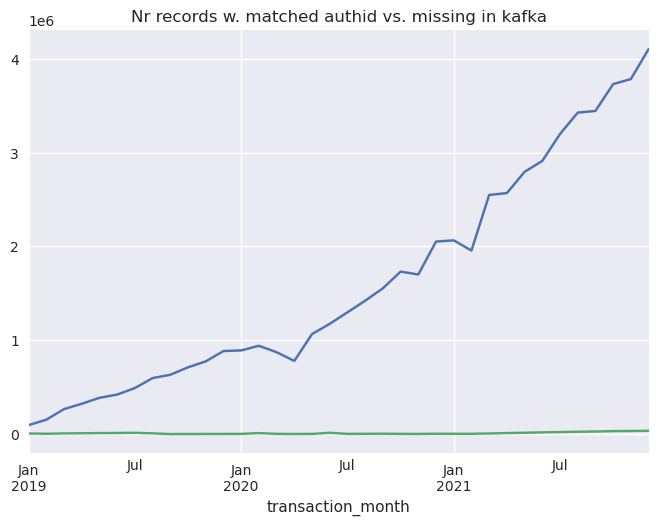

In [69]:
nr_records.nr_shared.plot(label="matched records")
nr_records.nr_unshared.plot(label="missing in kafka")
plt.title("Nr records w. matched authid vs. missing in kafka")
plt.show()

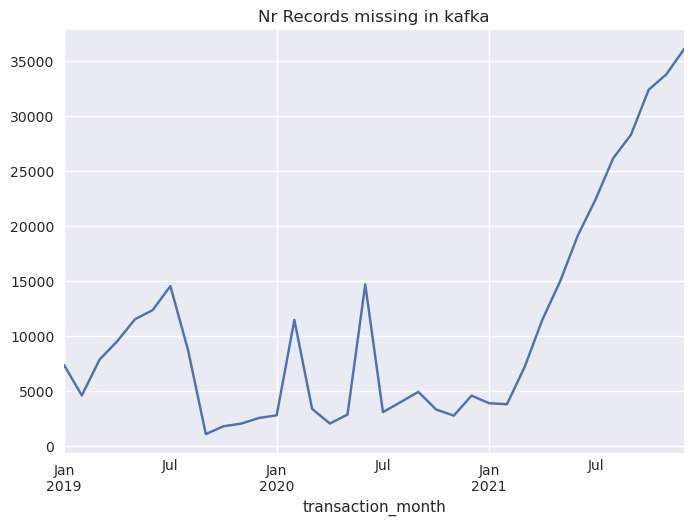

In [70]:
nr_records.nr_unshared.plot(label="missing in kafka")
plt.title("Nr Records missing in kafka")
plt.show()

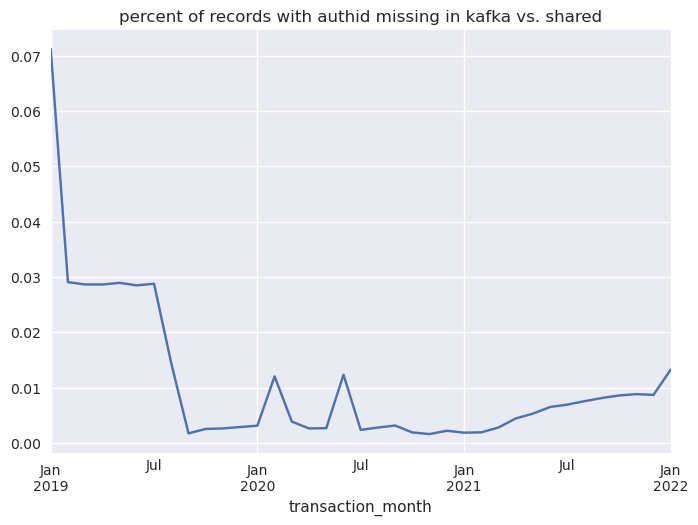

In [53]:
nr_records["pct_unshared"].plot()
plt.title("percent of records with authid missing in kafka vs. shared")  # measured by appearance of authid
plt.show()

In [49]:
df_dw[df_dw.authid.isin(unshared_authids)]

,transaction_date,time,business_account_number,created_dt,account_balance,transaction_code,amount,authid,is_credit,user_id
30,2022-01-06,19:15:03,410007903202,2022-01-06,-64.24,DWATM,193.50,A1641514503057492019199,0,16852407
222,2022-01-06,19:46:37,410016674780,2022-01-06,-34.09,POSDW,50.00,A1641516188956761019521,0,19353580
233,2022-01-06,19:48:57,410016275947,2022-01-06,-12.60,POSDW,5.00,A1641516537743233019199,0,15209384
407,2022-01-06,20:11:48,410007672385,2022-01-06,-2.05,POSDW,2.05,A1641517908445102018848,0,16744163
1638,2022-01-06,21:34:51,410023764403,2022-01-06,-0.43,POSDW,2.71,A1641522891623721019199,0,21181149
...,...,...,...,...,...,...,...,...,...,...
71630647,2022-01-06,17:46:37,410004129359,2022-01-06,-5.95,POSDW,9.48,A1641509197594628018848,0,15364180
71630669,2022-01-06,17:49:15,410004864884,2022-01-06,-5.23,POSDD,10.71,A1641509355148828018848,1,15878769
71631626,2022-01-06,18:02:32,410016949599,2022-01-06,-45.40,POSDW,12.55,A1641510152632458019521,0,19422309
71631821,2022-01-06,18:23:55,410011974135,2022-01-06,-22.75,POSDW,9.36,A1641511435020874018848,0,17772285


In [50]:
df_kafka[df_kafka.authid.isin(unshared_authids)]

,amount,user_id,transaction_code,transeq,isdebit,transaction_date,primarypartyid,business_account_number,account_balance,transaction_type,isvault,vaultendbalance,authid,offset,partition


#### What does the missing records look like

In [51]:
display(unshared_df.business_account_number.nunique())
display(unshared_df.transaction_code.value_counts())

57775

POSDW           491004
POSDD            15349
DWATM            12559
DDATMREFUND       7753
DWCRDBILLPAY      5931
DDCRDBILLREF      2850
DDA2ATXFR         1925
DWATMI            1111
DW                 212
DD                  34
DIPD                 1
Name: transaction_code, dtype: int64

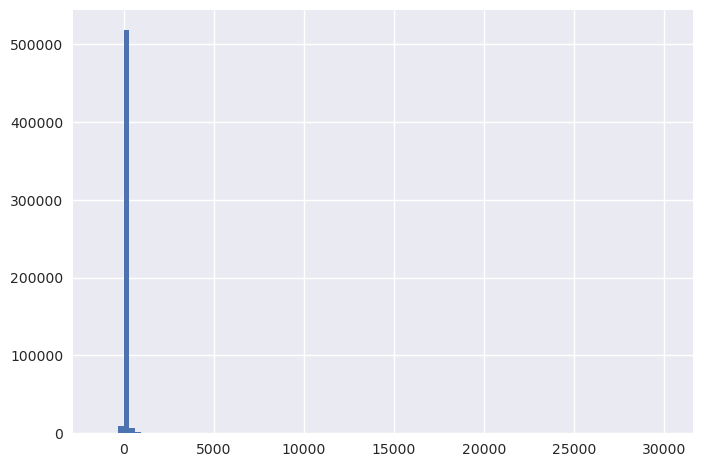

In [54]:
unshared_df.amount.hist(bins=100)
plt.show()